# Latent Dirichlet Allocation (LDA): An Ilustrative Example

- author: Tao Wang
- I refer to following online resources:
  - [Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECA4QAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Fend-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0&usg=AOvVaw3BOumfnMly0lUh3pfEHrWd)
  -[Topic Modeling with Gensim (Python) - Machine Learning Plus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECAIQAQ&url=https%3A%2F%2Fwww.machinelearningplus.com%2Fnlp%2Ftopic-modeling-gensim-python%2F&usg=AOvVaw09WN-93Y-Jk0fbq3KWF7qF)
  - [Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)
  

In [1]:
import time

start_code = time.time()

In [2]:
Fast = True
Prange = True

## Data importing

In [3]:
import pandas as pd

In [4]:
## Here, we use a sub-sample of NYT articles containing key words "inflation" as an example 
## it is saved as a pickle file (a handy and light-weighted data format in python) 
## the path and name

file_name = '../data/article_data.pkl'

article_data = pd.read_pickle(file_name)


In [5]:
## an example of the article 
## the second article in the database and the first 1000 words in the article
## only print part of the article to save the space 
article_data.iloc[2]['text'][:1000]

" WASHINGTON -- President Trump, who has spent months assailing the Federal Reserve for its interest rate policies, said he planned to nominate Christopher Waller, a longtime regional Fed official, and Judy Shelton, a Fed critic, to serve on the central bank's seven-member board.\nThe president announced his intentions on Tuesday evening in a series of tweets. Mr. Waller, the executive vice president at the Federal Reserve Bank of St. Louis, is a far more conventional pick than Mr. Trump's earlier Fed choices of Herman Cain and Stephen Moore.\nMr. Cain, a former presidential candidate, and Mr. Moore, a conservative economist, were outspoken pundits with strong political views. Both men -- whose past actions and views toward women elicited strong criticism -- withdrew from consideration after congressional opposition made it clear that neither would win Senate confirmation.\nMs. Shelton is a former Trump campaign adviser and transition team member who has been an outspoken advocate for 

## Text Preprocessing 

We will perform the following steps:

- __Tokenization__: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 2 characters are removed.
- All __stopwords__ are removed.
- Words are __lemmatized__ — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are __stemmed__ — words are reduced to their root form.

In [6]:
# I did not have gensim package installed. 
# so the following code is used to install it
# comment it out once it is run once 

In [7]:
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
#import nltk.stem as stemmer
import numpy as np
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')

In [8]:
from wordcloud import WordCloud

## stemming and lemmatizing

- Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [9]:
## write a function to lemmatize and stem the words 

def remove_email(text):
    return [re.sub('\S*@\S*\s?', '', email) for email in text]

def lemmatize_stemming(word):
    stemmer = SnowballStemmer("english")
    return WordNetLemmatizer().lemmatize(stemmer.stem(word))

## also remove stop words
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>=2:
            result.append(lemmatize_stemming(token))  
    return result

In [10]:
## apply above functions to an example article 

random_article = np.random.randint(0,1000)

one_article = article_data.iloc[random_article]['text']

print('original document: ')
print(one_article)

print('splitted into words: ')
one_artile = remove_email(one_article)
tokens = gensim.utils.simple_preprocess(one_article)
#words = []
#for word in one_article.split():
#    words.append(word)
print(tokens[:100])
print('\n\n tokenized and lemmatized document: ')
words_processed = preprocess(one_article)
print(words_processed[:200])

original document: 
 For nearly 10 years now, the flood of cash from global central banks has financed shopping malls in Istanbul, booming cities in China and 100-year bonds in Argentina. Today, many of the malls are empty, property developers in China are riddled with debt, and Argentina has just submitted to a bailout from the International Monetary Fund.
Now, the borrowing binge that fueled rapid growth in emerging markets and piled up returns for their investors is looking like a problem.
Financial experts worry that the turmoil in Turkey, which for the better part of a year has been contained, will spread, following the path of other emerging market meltdowns like those in Mexico in 1994 and Asia in 1997.
"The risk of contagion is pretty high," said Robert Subbaraman, an emerging market economist at Nomura in Singapore.
The crisis in Turkey has been made worse by a diplomatic dispute with the United States and the mercurial moods and questionable policy positions of President Rece

['near', 'year', 'flood', 'cash', 'global', 'central', 'bank', 'financ', 'shop', 'mall', 'istanbul', 'boom', 'citi', 'china', 'year', 'bond', 'argentina', 'today', 'mall', 'properti', 'develop', 'china', 'riddl', 'debt', 'argentina', 'submit', 'bailout', 'intern', 'monetari', 'fund', 'borrow', 'bing', 'fuel', 'rapid', 'growth', 'emerg', 'market', 'pile', 'return', 'investor', 'look', 'like', 'problem', 'financi', 'expert', 'worri', 'turmoil', 'turkey', 'better', 'year', 'contain', 'spread', 'follow', 'path', 'emerg', 'market', 'meltdown', 'like', 'mexico', 'asia', 'risk', 'contagion', 'pretti', 'high', 'said', 'robert', 'subbaraman', 'emerg', 'market', 'economist', 'nomura', 'singapor', 'crisi', 'turkey', 'wors', 'diplomat', 'disput', 'unit', 'state', 'mercuri', 'mood', 'question', 'polici', 'posit', 'presid', 'recep', 'tayyip', 'erdogan', 'combin', 'heavi', 'intern', 'borrow', 'fall', 'nation', 'currenc', 'scenario', 'undermin', 'emerg', 'economi', 'turkey', 'symptom', 'grow', 'challe

### Generate a wordcloud for an example article

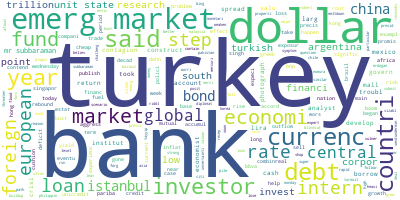

In [11]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width=3, 
                      contour_color='steelblue')
# Generate a word cloud
long_string=(" ").join(words_processed)  
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [12]:
## process all articles


start_process = time.time()

all_tokens = {}  # empty dictionary to save
id_map = {} ## map the id in the dataset to the id in the matrix (some articles are empty
id_count = -1  


if Prange:
    from numba import prange
    for i in prange(len(article_data)):
        #print(i)
        this_article = article_data['text'].iloc[i]
        if type(this_article)==str:
            #print('article '+str(i) + ' works')
            processed_docs = preprocess(this_article)
            all_tokens[i] = processed_docs
            #print(processed_docs[:10])
            id_count+=1
            id_map[i]=id_count 
            #print(id_count)

else:
    for i in range(len(article_data)):
        #print(i)
        this_article = article_data['text'].iloc[i]
        if type(this_article)==str:
            #print('article '+str(i) + ' works')
            processed_docs = preprocess(this_article)
            all_tokens[i] = processed_docs
            #print(processed_docs[:10])
            id_count+=1
            id_map[i]=id_count 
            #print(id_count)

all_tokens_list = [all_tokens[i] for i in all_tokens.keys()]

end_process = time.time()

In [13]:
print('Here are an example of the preprocessed words from a particular article')

print(all_tokens_list[10])

Here are an example of the preprocessed words from a particular article
['tehran', 'tehran', 'beat', 'motorcycl', 'cheap', 'fast', 'break', 'law', 'gridlock', 'traffic', 'motorcycl', 'pul', 'citi', 'million', 'nuisanc', 'necessari', 'tri', 'cultiv', 'special', 'relationship', 'motorcycl', 'mechan', 'tehran', 'talk', 'listen', 'farzad', 'motorcycl', 'mechan', 'work', 'hole', 'wall', 'garag', 'neighborhood', 'complain', 'price', 'engin', 'oil', 'tripl', 'late', 'custom', 'think', 'rip', 'said', 'tell', 'bazaar', 'buy', 'oil', 'want', 'll', 'chang', 'visit', 'erbil', 'iraqi', 'kurdistan', 'bought', 'pair', 'hike', 'shoe', 'eye', 'shone', 'gave', 'shoe', 'pair', 'bought', 'iran', 'cost', 'equival', 'month', 'wage', 'labor', 'thursday', 'morn', 'iran', 'shot', 'american', 'surveil', 'drone', 'american', 'claim', 'drone', 'intern', 'airspac', 'iranian', 'releas', 'compet', 'coordin', 'place', 'iranian', 'territori', 'thursday', 'night', 'presid', 'trump', 'approv', 'retaliatori', 'strike', '

## Bag-of-Words Representation of the Dataset

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.


In [14]:
from gensim.models import Phrases
bigram = Phrases(all_tokens_list, min_count=20)

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
for idx in range(len(all_tokens_list)):
    for token in bigram[all_tokens_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            all_tokens_list[idx].append(token)

In [15]:
len(all_tokens_list)

4991

### Split the tokens into two trained set and prediction set 



In [16]:
## for prediction 
all_tokens_list_predict = all_tokens_list[-100:-1]

## for training 
all_tokens_list = all_tokens_list[:-100]

In [17]:
## get the dictionary over all articles used for training the model 

dictionary = gensim.corpora.Dictionary(all_tokens_list)

## filter extreme values 
nb_doc = len(all_tokens_list)

no_below =int(0.01*nb_doc)
no_above =int(0.8*nb_doc)

dictionary.filter_extremes(no_below = no_below,
                          no_above = no_above)

In [18]:
## print some words from the dictionary 

print('The length of the dictionary: '+str(len(dictionary)))
print('Here are some words from the dictionary:')
count = 0
for x in dictionary.values():
    count=count + 1
    if count <=20:
        print(x)
    

The length of the dictionary: 4946
Here are some words from the dictionary:
act
actual
affect
age
agenc
ago
agre
ahead
aim
albeit
american
amid
appeal
ask
associ
assum
assumpt
averag
avoid
balanc


In [19]:
print("the corpus is essentially a frequency count of the present temrs in each article")

the corpus is essentially a frequency count of the present temrs in each article


In [20]:
## generate a bag of words for each article 
## i.e. count the frequency of each word in the dictionary in each article 
corpus = [dictionary.doc2bow(i) for i in all_tokens_list]

## Initialize LDA model



- The corpus or the document-term matrix to be passed to the model (in our example is called tokens_matrix)
- Number of Topics: num_topics is the number of topics we want to extract from the corpus.
- id2word: It is the mapping from word indices to words. Each of the words has an index that is present in the dictionary.
- Number of Iterations: it is represented by Passes in Python. Another technical word for iterations is ‘epochs’. Passes control how often we want to train the model on the entire corpus for convergence.
- Chunksize: It is the number of documents to be used in each training chunk. The chunksize controls how many documents can be processed at one time in the training algorithm.
   - Alpha: is the document-topic density
   - Beta: (In Python, this parameter is called ‘eta’): is the topic word density
 
    - For instance, the higher values of alpha —> the documents will be composed of more topics, and
    - The lower values of alpha —> returns documents with fewer topics.

In [21]:
import time 

start_lda = time.time()

Lda = gensim.models.ldamodel.LdaModel
LdaM = gensim.models.ldamulticore.LdaMulticore


nb_topics = 3

if Fast:
    ldamodel = LdaM(corpus,
                   num_topics= nb_topics,
                   id2word=dictionary,
                   chunksize = 100,
                   alpha='asymmetric', ## or 'symmetric'
                   eta='auto',
                   iterations = 200,
                   passes=1,
                   random_state=2019,
                   eval_every=None)
    
else:
    ldamodel = Lda(corpus,
                   num_topics= nb_topics,
                   id2word=dictionary,
                   chunksize = 100,
                   alpha='auto', ## or 'symmetric'
                   eta='auto',
                   iterations = 200,
                   passes= 1,
                   random_state=2019,
                   eval_every=None)
    
## save the model as an instance so that no need to retrained everytime 
ldamodel.save('./model/trained_results.model')
end_lda = time.time()

print('time taken to run the lda model: is {}'.format(str(end_lda-start_lda)))

time taken to run the lda model: is 10.376625061035156


In [22]:
## load the model from storage 

ldamodel = gensim.models.ldamodel.LdaModel.load('./model/trained_results.model')

## also load the dictionary 
dictionary = gensim.corpora.Dictionary.load('./model/trained_results.model.id2word')

In [23]:
print('These are the the most common words for each topic')
ldamodel.print_topics(num_words=20)

These are the the most common words for each topic


[(0,
  '0.013*"said" + 0.012*"mr" + 0.011*"year" + 0.010*"percent" + 0.006*"state" + 0.006*"new" + 0.005*"time" + 0.005*"like" + 0.004*"govern" + 0.004*"market" + 0.004*"econom" + 0.004*"tax" + 0.004*"price" + 0.004*"rate" + 0.004*"economi" + 0.004*"compani" + 0.004*"unit" + 0.004*"peopl" + 0.003*"american" + 0.003*"unit_state"'),
 (1,
  '0.014*"mr" + 0.013*"said" + 0.013*"fed" + 0.011*"rate" + 0.010*"bank" + 0.008*"year" + 0.007*"economi" + 0.007*"econom" + 0.007*"percent" + 0.006*"inflat" + 0.006*"polici" + 0.005*"market" + 0.005*"presid" + 0.005*"growth" + 0.005*"state" + 0.005*"central" + 0.005*"govern" + 0.004*"unit" + 0.004*"like" + 0.004*"countri"'),
 (2,
  '0.014*"percent" + 0.010*"year" + 0.009*"said" + 0.007*"market" + 0.006*"state" + 0.006*"rate" + 0.006*"price" + 0.006*"economi" + 0.005*"mr" + 0.005*"compani" + 0.005*"new" + 0.005*"stock" + 0.005*"like" + 0.004*"time" + 0.004*"tax" + 0.004*"econom" + 0.004*"increas" + 0.004*"inflat" + 0.004*"american" + 0.004*"govern"')]

### Assign topics to each article  in the training set


In [24]:
count = 0 
for i in ldamodel[corpus]:
    if count <=30:
        print('article',count,i)
    count +=1 

article 0 [(1, 0.67850584), (2, 0.31999063)]
article 1 [(0, 0.0276069), (2, 0.97154975)]
article 2 [(1, 0.99717945)]
article 3 [(0, 0.7879425), (2, 0.21146128)]
article 4 [(1, 0.9985767)]
article 5 [(0, 0.77296966), (2, 0.22559923)]
article 6 [(1, 0.99787414)]
article 7 [(1, 0.998438)]
article 8 [(1, 0.99761915)]
article 9 [(0, 0.9993036)]
article 10 [(0, 0.533483), (1, 0.46610707)]
article 11 [(0, 0.14119108), (1, 0.8585188)]
article 12 [(1, 0.9964447)]
article 13 [(1, 0.99771607)]
article 14 [(1, 0.6455992), (2, 0.35102975)]
article 15 [(1, 0.99722254)]
article 16 [(1, 0.6504975), (2, 0.34702975)]
article 17 [(1, 0.99861157)]
article 18 [(0, 0.048294198), (1, 0.44487616), (2, 0.5068296)]
article 19 [(1, 0.9990207)]
article 20 [(1, 0.9979613)]
article 21 [(1, 0.9980781)]
article 22 [(1, 0.9989766)]
article 23 [(0, 0.97294956), (2, 0.026582431)]
article 24 [(0, 0.8081357), (2, 0.19120343)]
article 25 [(0, 0.39019048), (2, 0.60892135)]
article 26 [(0, 0.9991833)]
article 27 [(0, 0.89168

- For instance, article 1 has the highest weight (0.8411557) on the second topic 

In [25]:
## Use the trained model to predict topic of an out-of-sample article 
## notice here we use dictionary from training text to get the bow representation of prediction text (some tokens are new so they are ignored)


corpus_predict = [dictionary.doc2bow(i) for i in all_tokens_list_predict]

print('predicting topics of out-of-sample texts')
for i in ldamodel[corpus_predict]:
    print(i)

predicting topics of out-of-sample texts
[(1, 0.122577734), (2, 0.87445563)]
[(0, 0.10430253), (1, 0.5045181), (2, 0.39117935)]
[(0, 0.60095274), (1, 0.39142355)]
[(2, 0.99478817)]
[(1, 0.8060744), (2, 0.19182213)]
[(0, 0.7915233), (1, 0.20733438)]
[(0, 0.99870294)]
[(2, 0.9972574)]
[(0, 0.44751015), (2, 0.55198634)]
[(0, 0.43897846), (2, 0.56052226)]
[(2, 0.9976553)]
[(0, 0.069935195), (1, 0.22050542), (2, 0.70955944)]
[(1, 0.35576436), (2, 0.6420757)]
[(2, 0.9970466)]
[(2, 0.99602956)]
[(0, 0.99882996)]
[(0, 0.99883354)]
[(2, 0.9973938)]
[(1, 0.9948137)]
[(1, 0.9965695)]
[(0, 0.9448342), (1, 0.05491122)]
[(0, 0.99848324)]
[(0, 0.34299663), (2, 0.6563638)]
[(2, 0.99417925)]
[(0, 0.8887652), (2, 0.110675044)]
[(1, 0.998232)]
[(2, 0.99421394)]
[(0, 0.99903005)]
[(0, 0.095223166), (1, 0.14548308), (2, 0.75929374)]
[(0, 0.9989247)]
[(0, 0.072967224), (2, 0.9265686)]
[(1, 0.50686014), (2, 0.4910055)]
[(0, 0.018879153), (2, 0.9804529)]
[(2, 0.9964247)]
[(2, 0.9960766)]
[(2, 0.99342895)]
[(2

### Assign topics to each article and creating article-weight matrix

In [26]:
print('nb of articles in the sample: '+str(len(article_data)))
print('nb of articles with non-empty topic model results: '+str(len(ldamodel[corpus])))
print('\n\n')

count = 0 
for i in ldamodel[corpus]:
    if count <=30:
        print('article',count,i)
    count +=1 

nb of articles in the sample: 5271
nb of articles with non-empty topic model results: 4891



article 0 [(1, 0.6785065), (2, 0.31999004)]
article 1 [(0, 0.02627541), (2, 0.9728812)]
article 2 [(1, 0.9971795)]
article 3 [(0, 0.78768826), (2, 0.21171555)]
article 4 [(1, 0.99857694)]
article 5 [(0, 0.77287465), (2, 0.22569422)]
article 6 [(1, 0.99787587)]
article 7 [(1, 0.998438)]
article 8 [(1, 0.9976192)]
article 9 [(0, 0.99930376)]
article 10 [(0, 0.5334836), (1, 0.46610647)]
article 11 [(0, 0.14119013), (1, 0.8585197)]
article 12 [(1, 0.9965331)]
article 13 [(1, 0.99771637)]
article 14 [(1, 0.6455996), (2, 0.3510291)]
article 15 [(1, 0.99722356)]
article 16 [(1, 0.65049803), (2, 0.3470291)]
article 17 [(1, 0.9986107)]
article 18 [(0, 0.045695093), (1, 0.44545388), (2, 0.50885105)]
article 19 [(1, 0.99902093)]
article 20 [(1, 0.99796253)]
article 21 [(1, 0.998077)]
article 22 [(1, 0.9989761)]
article 23 [(0, 0.9743656), (2, 0.025166402)]
article 24 [(0, 0.8079949), (2, 0.19134426)]
art

In [27]:
article_weight_dict = {}

for count, topic_weight in enumerate(ldamodel[corpus]):
    #print(count)
    #print(topic_weight)
    this_article_weight = dict(topic_weight)
    #print(this_article_weight)
    article_weight_dict.update({count:this_article_weight})

In [28]:
## convert it to a dataframe 
article_weight = pd.DataFrame.from_dict(article_weight_dict,orient='index')
article_weight = article_weight.fillna(0.0)

In [29]:
## each article and its topic weight

article_weight

,1,2,0
0,0.678507,0.31999,0.000000
2,0.997179,0.00000,0.000000
4,0.998577,0.00000,0.000000
6,0.997874,0.00000,0.000000
7,0.998439,0.00000,0.000000
...,...,...,...
4841,0.000000,0.00000,0.998239
4847,0.000000,0.00000,0.998915
4871,0.000000,0.00000,0.998957
4887,0.000000,0.00000,0.998942


In [30]:
## representative article 

## rep article

rep_article_dict = {}
rep_article_text_dict = {}

for i in range(nb_topics):
    ## article id
    rep_id = article_weight[i].argmax()
    rep_article_dict.update({i:rep_id})
    
    ## articlde text
    rep_text = article_data['text'].iloc[rep_id]
    rep_article_text_dict.update({i:rep_text})
    
rep_article = pd.DataFrame.from_dict(rep_article_dict,
                                     orient='index',
                                    columns=['article_id'])

rep_article_text = pd.DataFrame.from_dict(rep_article_text_dict,
                                     orient='index',
                                    columns=['article_text'])

rep_article = pd.merge(rep_article,
                      rep_article_text,
                      left_index =True,
                      right_index=True)

rep_article

,article_id,article_text
0,4734,WASHINGTON -- President Obama gets high marks...
1,1395,The labor market is stumping even the experts...
2,3680,"CORRECTION APPENDED\nADA, Ohio -- Kelsey Grif..."


## Visualization of the topic models 


In [31]:
## uncomment the code below if there is no pyLDAvis installed 
#pip install pyLDAvis

In [32]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [33]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(vis, '../figure/first_run.html')   ## save it as a html file 
vis   ## show the figure 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.012028 -0.017387       1        1  35.431029
2     -0.022738  0.014148       2        1  34.330489
1      0.034766  0.003238       3        1  30.238482, topic_info=        Term          Freq         Total Category  logprob  loglift
100      fed  13373.000000  13373.000000  Default  30.0000  30.0000
20      bank  13368.000000  13368.000000  Default  29.0000  29.0000
583       mr  28532.000000  28532.000000  Default  28.0000  28.0000
34   central   5941.000000   5941.000000  Default  27.0000  27.0000
210     rate  18682.000000  18682.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
128  increas   3057.413387  10079.590282   Topic3  -5.6132   0.0031
149     like   3305.942625  12191.042177   Topic3  -5.5350  -0.1089
261     time   3048.139657  11905.950522   Topic3  -5.6162  -0.1665
171      new   3053.142162  13137.790811   Topic3  -5.6146  -0.2633
200    price   2775.956099  12426.471777   Topic3  -5.7098  -0.3028

[278 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2612      1  0.786897       acr
2612      2  0.130066       acr
2612      3  0.084543       acr
10        1  0.352053  american
10        2  0.400372  american
...     ...       ...       ...
2051      2  0.036994    yellen
2051      3  0.802710    yellen
294       1  0.466608      york
294       2  0.343758      york
294       3  0.189636      york

[604 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [34]:
end_code = time.time()

## Topic intensity over time

In [36]:
## in the main dataset, we add columns sized of nb of topics, recording the score of each topic of that article 

for nb in range(nb_topics):
    
    ## for a particular topic 
    weight_dict = {}
    
    for i in range(len(corpus)):
        if i in id_map.keys():
            this_id = id_map[i]  ## id_map maps id in the dataset and in the model 
            weight_list = dict(ldamodel[corpus][this_id])
            
            
            if nb in weight_list:
                #article_data['weight_topic'+str(nb)].iloc[i] = weight_list[nb]
                weight_dict[i] = weight_list[nb]
            else:
                #article_data['weight_topic'+str(nb)].iloc[i] = 0.0
                weight_dict[i] = 0.0
                
    # merge this back to main data
    weight_df = pd.DataFrame(list(weight_dict.items()),
                             columns = ['id','weight_topic'+str(nb)])
    weight_df.set_index('id', drop = True, inplace = True)
    article_data = pd.merge(article_data,
                           weight_df,
                           left_index = True,
                           right_index = True,
                           how='outer')

In [37]:
## the columns on the right are newly added 

article_data.head(5)

,author,text,subject,location,company,people,organization,title,doctype,date,weight_topic0,weight_topic1,weight_topic2
0,"Irwin, Neil","American borrowing costs keep plunging, and t...",Unemployment; Economic conditions; Interest r...,NaN,NaN,NaN,Name: New York Stock Exchange--NYSE; NAICS: 5...,"Rates Keep Falling, Befuddling the Experts",News,2019-07-05,0.000000,0.678505,0.319992
1,NaN,Raise a glass to the longest economic expansi...,Executive compensation; Unemployment; Economi...,United States--US,NaN,NaN,NaN,Two Cheers for a Lackluster Economy,"Opinions, Editorial",2019-07-03,0.028030,0.000000,0.972190
2,"Smialek, Jeanna","WASHINGTON -- President Trump, who has spent ...",Nominations; Interest rates; Central banks; F...,United States--US China Japan,NaN,"Trump, Donald J Bullard, James Waller, Christ...","Name: Brookings Institution; NAICS: 541711, 5...",Trump Picks Fed Veteran And Fed Critic for Board,News,2019-07-03,0.000000,0.997178,0.000000
3,"Friedman, Thomas L",Near the close of last Wednesday's Democratic...,Life expectancy; Political parties; Geopoliti...,United States--US,NaN,NaN,NaN,The Biggest Threat to America Is Us,"Commentary, Opinions",2019-07-03,0.787828,0.000000,0.211794
4,"Sanger, David E",WASHINGTON -- Iran on Monday violated a key p...,Agreements; Violations; Nuclear fuels; Diplom...,Iran United States--US,NaN,"Trump, Donald J Pompeo, Mike Zarif, Mohammed ...",Name: Department of Defense; NAICS: 928110; N...,Iran Breaches Nuclear Limit Set in '15 Deal,News,2019-07-02,0.000000,0.998578,0.000000


In [38]:
## set date 
article_data['date'] = pd.to_datetime(article_data['date'],
                                      errors='coerce')

In [39]:
import datetime as dt 
article_data['month_date'] = pd.to_datetime(article_data['date']).dt.to_period('M')

Text(0.5, 1.0, 'Average Topic Intensity over time (7-day moving average)')

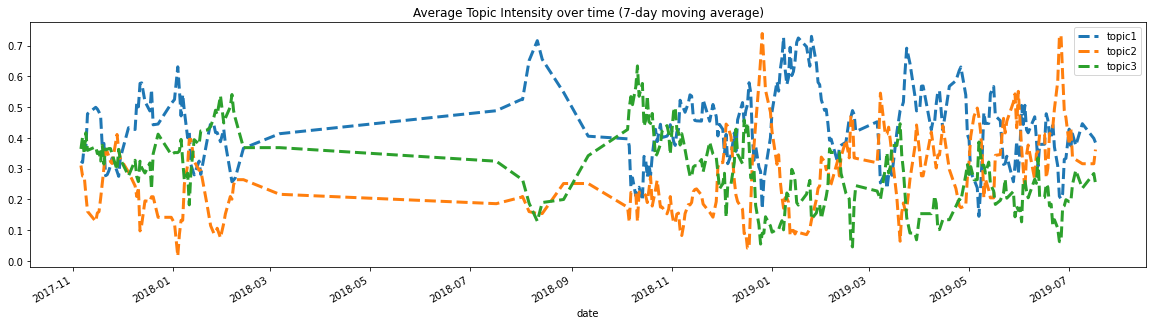

In [40]:
## day by day 
fig = plt.figure(figsize=(20,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['date'])['weight_topic'+str(nb)].mean()
    intensity_mv = intensity.rolling(7).mean()
    intensity_mv.plot(lw=3,
                   style='--',
                   label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (7-day moving average)')
## notice in this data, the dates are very sparse, hence daily plot may not be very meaningful 

Text(0.5, 1.0, 'Average Topic Intensity over time (monthly)')

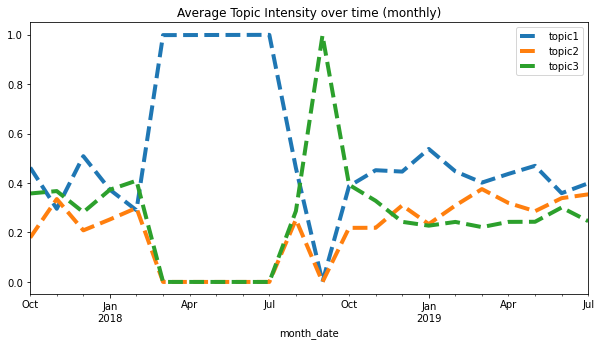

In [41]:
## month by month 

fig = plt.figure(figsize=(10,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['month_date'])['weight_topic'+str(nb)].mean()
    #intensity = intensity/intensity[0]
    intensity.plot(lw=4,
                   style='--',
                  label='topic'+str(nb+1))
    #plt.plot(intensity,
    #         lw = 2,
    #         label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (monthly)')

## Run time

In [42]:
print('time taken to process the text: is {}'.format(str(end_process-start_process)))
print('time taken to train the lda model: is {}'.format(str(end_lda-start_lda)))
print('time taken to run all code : is {}'.format(str(end_code-start_code)))

time taken to process the text: is 49.7111029624939
time taken to train the lda model: is 10.376625061035156
time taken to run all code : is 99.36451721191406
